In [10]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [11]:
jra55 = xr.open_dataset('/home/links/ct715/data_storage/reanalysis/jra55_daily/variables/mslp/slp_monthly_jra55_1958_2016.nc')
jra55 = jra55.resample(time="1MS").mean()
jra55 = jra55.mean('lon')
jra55['slp'] = jra55['slp'] / 100  # Convert from Pa to hPa
jra55

<xarray.Dataset> Size: 213kB
Dimensions:  (time: 708, lat: 73)
Coordinates:
  * lat      (lat) float64 584B -90.0 -87.5 -85.0 -82.5 ... 82.5 85.0 87.5 90.0
  * time     (time) datetime64[ns] 6kB 1958-01-01 1958-02-01 ... 2016-12-01
Data variables:
    slp      (time, lat) float32 207kB 1.01e+03 1.008e+03 ... 1.007e+03

In [12]:
# Use nearest grid point to 35° and 65° latitude
lat35 = jra55.lat.sel(lat=35, method="nearest")
lat65 = jra55.lat.sel(lat=65, method="nearest")
p35 = jra55['slp'].sel(lat=lat35)   # (time) hPa
p65 = jra55['slp'].sel(lat=lat65)   # (time) hPa

# Here I normalise with the full record
mean35, std35 = p35.mean('time'), p35.std('time')
mean65, std65 = p65.mean('time'), p65.std('time')

# standardise...????
p35_star = (p35 - mean35) / std35
p65_star = (p65 - mean65) / std65

# Calc difference
aoi = p35_star - p65_star

# Resample to quarterly means
aoi_qtr = aoi.resample(time="1QS-DEC").mean()

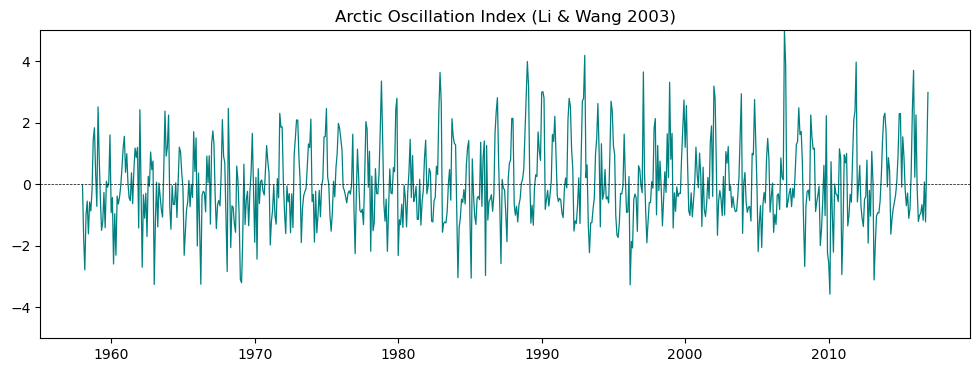

In [13]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(aoi.time, aoi, color="teal", linewidth=0.9)
plt.axhline(0, color="k", linewidth=0.5, linestyle="--")
plt.title(f"Arctic Oscillation Index (Li & Wang 2003)")
plt.ylim(-5,5)
plt.show()

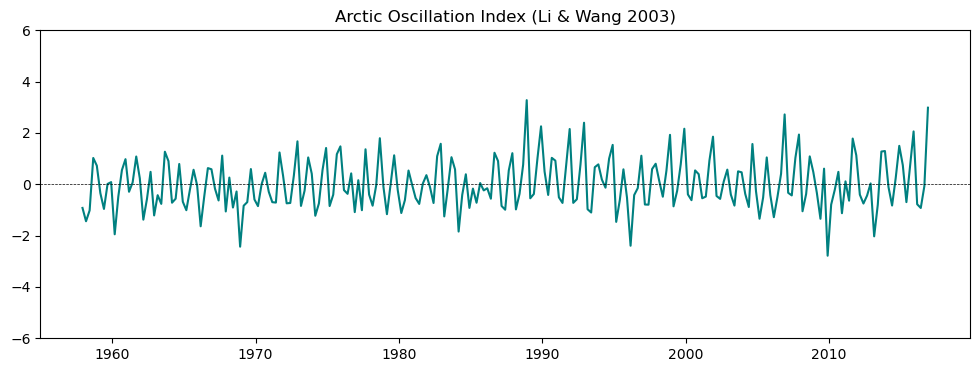

In [14]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(aoi_qtr.time, aoi_qtr, color="teal")
plt.axhline(0, color="k", linewidth=0.5, linestyle="--")
plt.title(f"Arctic Oscillation Index (Li & Wang 2003)")
plt.ylim(-6,6)
plt.show()


# Non-standardised

In [15]:
# Use nearest grid point to 35° and 65° latitude
lat35 = jra55.lat.sel(lat=35, method="nearest")
lat65 = jra55.lat.sel(lat=65, method="nearest")
p35 = jra55['slp'].sel(lat=lat35)   # (time) hPa
p65 = jra55['slp'].sel(lat=lat65)   # (time) hPa

# Calc difference
aoi_nonstd = p35 - p65

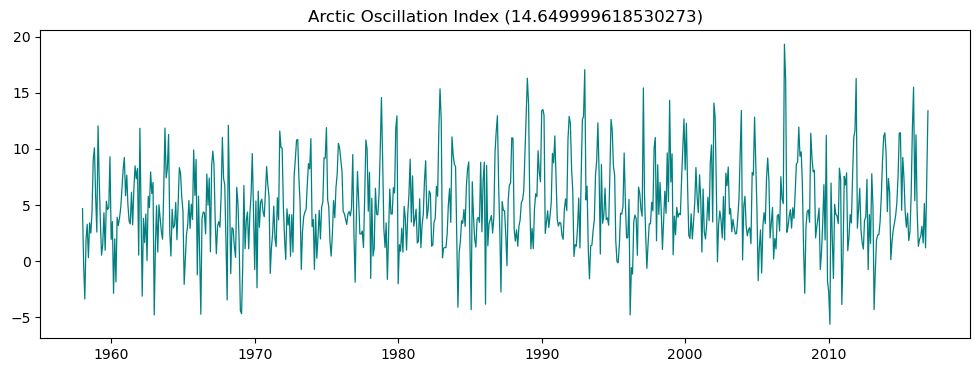

In [16]:
# Plot
plt.figure(figsize=(12, 4))
plt.plot(aoi_nonstd.time, aoi_nonstd, color="teal", linewidth=0.9)
plt.title(f"Arctic Oscillation Index ({(aoi_nonstd.var().values.round(2))})")
plt.show()